## Importing requried libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading the data set

In [2]:
heart_dataset= pd.read_csv('heart.csv')

In [3]:
heart_dataset.head() #Displaying the top rows from the data set.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_dataset.tail() #Displaying the bottom from the data set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_dataset.describe() #we will check some statistical measures of the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  1 == Defective Heart 0 == Healthy Heart

In [7]:
#In this data set the target columns will represents the person is having the healthy heart or not.
heart_dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

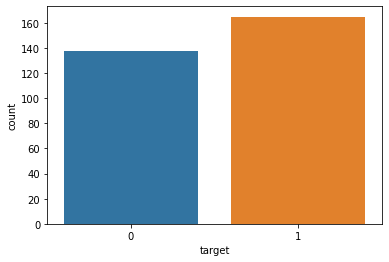

In [8]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.countplot(x='target',data=heart_dataset)

'chest pain type \n0: Typical angina: chest pain related decrease blood supply to the heart.\n1: Atypical angina: chest pain not related to heart.\n2: Non-anginal pain: typically esophageal spasms (non heart related)\n3: Asymptomatic: chest pain not showing signs of disease '

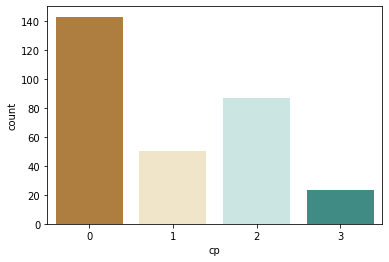

In [9]:
sns.countplot(x='cp',data=heart_dataset,palette='BrBG')
"""chest pain type 
0: Typical angina: chest pain related decrease blood supply to the heart.
1: Atypical angina: chest pain not related to heart.
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease """

<AxesSubplot:xlabel='fbs', ylabel='count'>

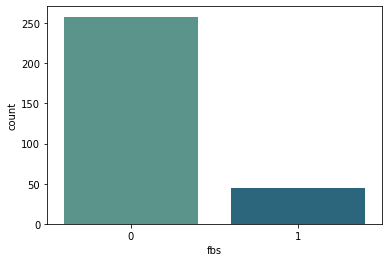

In [10]:
sns.countplot(x='fbs',data=heart_dataset,palette='crest') #fasting blood sugar


<AxesSubplot:xlabel='ca', ylabel='count'>

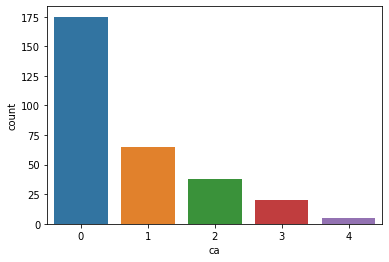

In [11]:
sns.countplot(x='ca',data=heart_dataset)

In [13]:
#Splitting the features and the target by train_test_split
X = heart_dataset.drop(columns='target', axis=1)
Y = heart_dataset['target']

In [14]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
X_train.shape


(181, 13)

In [17]:
X_test.shape

(122, 13)

In [18]:
X.shape  #Means this function given 60% to train data and 40% to test data

(303, 13)

## Training the Model Using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

C:\Users\relicance\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation For Logistic Regression Using Accuracy Score

In [20]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy on Training data using Logistic Regression : ', training_data_accuracy*100)

Accuracy on Training data using Logistic Regression :  86.1878453038674


In [22]:
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data using Logistice Regression : ', test_data_accuracy*100)

Accuracy on Test data using Logistice Regression :  84.42622950819673


## Training the Model using Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=101)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=101)

## Model Evaluation For Decision Tree Classifier Using Accuracy Score

In [24]:
X_train_prediction2 = model2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)
print('Accuracy on Training data using Decision Tree Classifier : ', training_data_accuracy2*100)

Accuracy on Training data using Decision Tree Classifier :  100.0


In [25]:
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)
print('Accuracy on Test data using Decision Tree Classifier : ', test_data_accuracy2*100)

Accuracy on Test data using Decision Tree Classifier :  81.9672131147541


## Training accuracy plot graph

<AxesSubplot:xlabel='Algorithms', ylabel='training accuracy'>

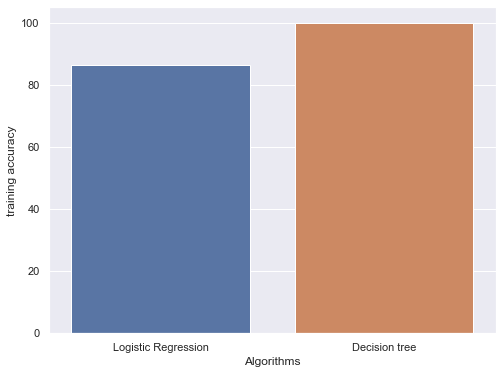

In [26]:
training_accuracy = [training_data_accuracy*100,training_data_accuracy2*100]
algorithms = ["Logistic Regression","Decision tree"]    

sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("training accuracy")

sns.barplot(algorithms,training_accuracy)

## Testing accuracy plot graph

<AxesSubplot:xlabel='Algorithms', ylabel='testing accuracy'>

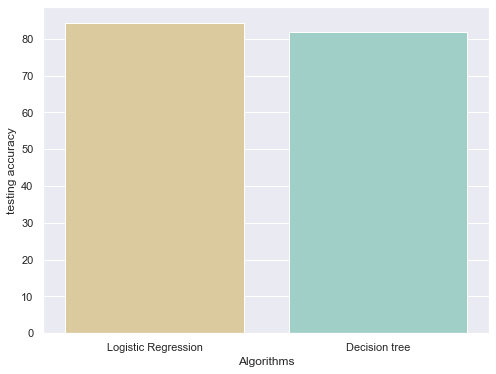

In [27]:
testing_accuracy = [test_data_accuracy*100,test_data_accuracy2*100]
algorithms = ["Logistic Regression","Decision tree"]    

sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("testing accuracy")

sns.barplot(algorithms,testing_accuracy,palette='BrBG')

## Comparing the Accuracy Scores of the two Models

In [28]:
results_df = pd.DataFrame(data=[["Logistic Regression", training_data_accuracy*100, test_data_accuracy*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier",training_data_accuracy2*100, test_data_accuracy2*100]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
#The Final Data Frame of the accuracy score of all results.

results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.187845,84.426230
1,Decision Tree Classifier,100.000000,81.967213


### So by Analysing the above table We can easily guess that Logistic Regression is Performing a well Training and Testing accuracy Score. So we will Continue Predicting the new Data with Logistic Regression Model.

In [29]:
# values of a person heart scan
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#predicting data using Logistic Regression
prediction = model1.predict(input_data_reshaped)

if (prediction[0]== 0):
    arr1=['Relax! you does not have a Heart Disease.','You can enjoy your life!','Have a nice day!']
    for i in arr1:
        print(i)
else:
    arr2=['You have Heart Disease','Need to be healthy','Maintain good health diet and exercise regularly']
    for j in arr2:
        print(j)

Relax! you does not have a Heart Disease.
You can enjoy your life!
Have a nice day!


In [30]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)

if (prediction[0]== 0):
    arr1=['Relax! you does not have a Heart Disease.','You can enjoy your life!','Have a nice day!']
    for i in arr1:
        print(i)
else:
    arr2=['You have Heart Disease.','Need to be healthy','Maintain good health diet and exercise regularly!']
    for j in arr2:
        print(j)

You have Heart Disease.
Need to be healthy
Maintain good health diet and exercise regularly!


In [32]:
input_data = (37,1,2,130,250,0,1,187,0,3.5,0,0,2)

input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model1.predict(input_data_reshaped)
if (prediction[0]== 0):
    arr1=['Relax! you does not have a Heart Disease.','You can enjoy your life!','Have a nice day!']
    for i in arr1:
        print(i)
else:
    arr2=['You have Heart Disease','Need to be healthy','Maintain good health diet and exercise regularly']
    for j in arr2:
        print(j)

You have Heart Disease
Need to be healthy
Maintain good health diet and exercise regularly
